
# ETAPA 4: ANÁLISIS EXPLORATORIO DE DATOS (EDA)
## Proyecto: Análisis de Accidentes de Tránsito en Sonora
### Pregunta de investigación: ¿Cuál es el vehículo más peligroso de manejar en Sonora y cuáles son las causas?

---
## Objetivos del EDA:
1. Analizar series de tiempo de accidentes (2022-2024)
2. Identificar patrones temporales (años, meses, días, horas)
3. Analizar tipos de vehículos involucrados
4. Identificar las principales causas de accidentes
5. Responder: ¿Cuál es el vehículo más peligroso?


## 1. CONFIGURACIÓN Y CARGA DE DATOS


In [113]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [114]:

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


Conectandonos a la base de datos y descargando los datos

In [115]:
# Configuración de conexión a PostgreSQL
DB_CONFIG = {
    'host': 'localhost',
    'port': 5432,
    'user': 'postgres',
    'password': 'mario1',  # CAMBIAR por tu contraseña
    'database': 'accidentes_hermosillo'
}

# Crear conexión
engine = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@"
    f"{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
)

print("✅ Conexión a base de datos establecida")

# Cargar datos desde PostgreSQL
query = "SELECT * FROM accidentes_hermosillo"
df = pd.read_sql(query, engine)

print(f"✅ Datos cargados: {len(df):,} registros")
print(f"📅 Período: {df['anio'].min()} - {df['anio'].max()}")
print(f"📊 Columnas: {len(df.columns)}")

# Mostrar primeras filas
df.head()

✅ Conexión a base de datos establecida
✅ Datos cargados: 77,963 registros
📅 Período: 2022 - 2024
📊 Columnas: 47


,id,cobertura,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,diasemana,...,peatherido,ciclmuerto,ciclherido,otromuerto,otroherido,nemuerto,neherido,clasacc,estatus,año
0,1,Municipal,26,1,2022,1,23,0,28,lunes,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2022
1,2,Municipal,26,1,2022,2,23,0,28,lunes,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2022
2,3,Municipal,26,1,2022,3,23,0,28,lunes,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2022
3,4,Municipal,26,1,2022,4,23,0,28,lunes,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2022
4,5,Municipal,26,1,2022,5,23,0,28,lunes,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2022


## 2. ANÁLISIS EXPLORATORIO INICIAL


In [116]:
# Información general del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print(f"\n📊 Dimensiones: {df.shape}")
print(f"📅 Período: {df['anio'].min()} - {df['anio'].max()}")
print(f"🚗 Total de accidentes: {len(df):,}")

INFORMACIÓN GENERAL DEL DATASET

📊 Dimensiones: (77963, 47)
📅 Período: 2022 - 2024
🚗 Total de accidentes: 77,963


In [117]:
# Estadísticas descriptivas básicas
print("ESTADÍSTICAS DESCRIPTIVAS")
df.describe()


ESTADÍSTICAS DESCRIPTIVAS


,id,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,automovil,campasaj,...,pasamuerto,pasaherido,peatmuerto,peatherido,ciclmuerto,ciclherido,otromuerto,otroherido,nemuerto,neherido
count,77963.000000,77963.0,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,...,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.000000,77963.0,77963.0
mean,38982.000000,26.0,32.777459,2022.993805,6.588561,13.723471,25.257314,15.796827,1.265216,0.186576,...,0.002065,0.045445,0.001950,0.026436,0.000346,0.004836,0.000038,0.000321,0.0,0.0
std,22506.123856,0.0,12.846555,0.808535,3.438411,5.634541,17.828155,8.843652,0.760998,0.437495,...,0.058485,0.340671,0.044112,0.168157,0.018607,0.070471,0.006203,0.019284,0.0,0.0
min,1.000000,26.0,1.000000,2022.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,19491.500000,26.0,29.000000,2022.000000,4.000000,10.000000,10.000000,8.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,38982.000000,26.0,30.000000,2023.000000,7.000000,14.000000,25.000000,16.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,58472.500000,26.0,33.000000,2024.000000,10.000000,18.000000,40.000000,24.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,77963.000000,26.0,72.000000,2024.000000,12.000000,99.000000,99.000000,31.000000,8.000000,5.000000,...,5.000000,22.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,0.0,0.0


In [118]:
# Verificar valores nulos
print("ANÁLISIS DE VALORES NULOS")
nulos = df.isnull().sum()
nulos_pct = (nulos / len(df) * 100).round(2)
nulos_df = pd.DataFrame({
    'Columna': nulos.index,
    'Valores_Nulos': nulos.values,
    'Porcentaje': nulos_pct.values
})
nulos_df = nulos_df[nulos_df['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if len(nulos_df) > 0:
    print(nulos_df.to_string(index=False))
else:
    print("✅ No hay valores nulos en el dataset")


ANÁLISIS DE VALORES NULOS
✅ No hay valores nulos en el dataset


## 3. ANÁLISIS DE SERIES DE TIEMPO
### 3.1 Tendencia Anual de Accidentes

In [119]:
# Crear DataFrame de series de tiempo
df['fecha'] = pd.to_datetime(dict(year=df['anio'], month=df['mes'], day=df['id_dia']), errors='coerce')
df = df.sort_values('fecha')

# Accidentes por año
accidentes_anual = df.groupby('anio').size().reset_index(name='cantidad')

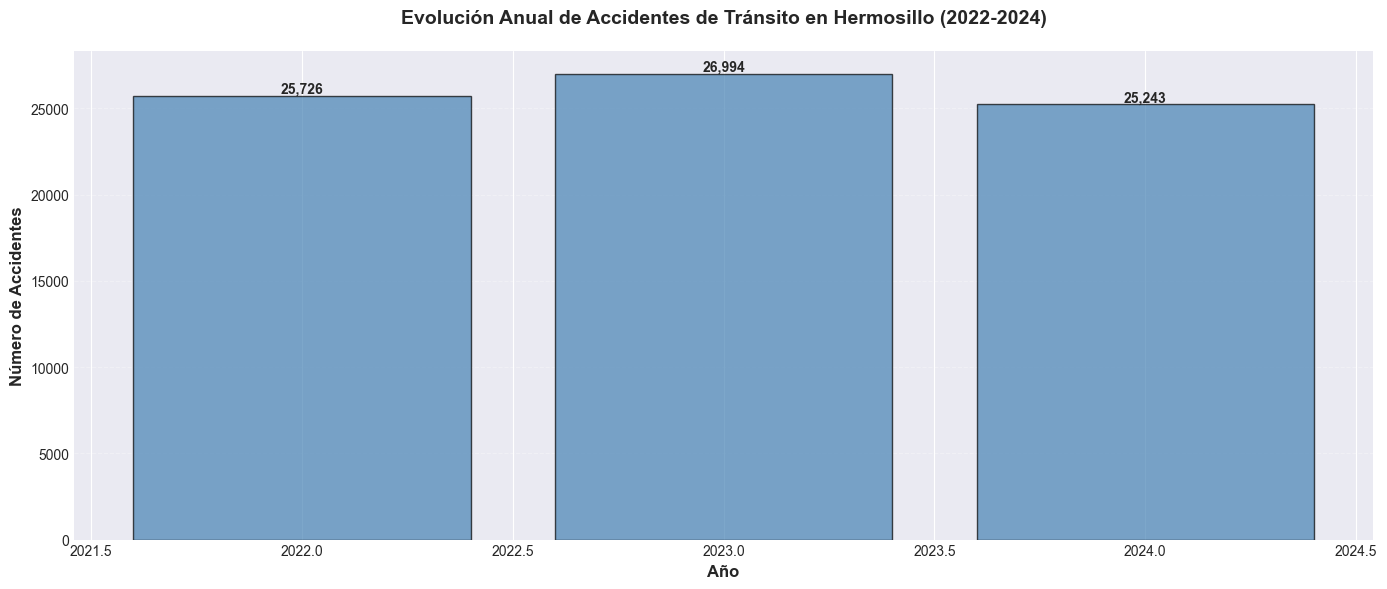

In [120]:
# Visualización
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(accidentes_anual['anio'], accidentes_anual['cantidad'], 
              color='steelblue', edgecolor='black', alpha=0.7)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Año', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax.set_title('Evolución Anual de Accidentes de Tránsito en Hermosillo (2022-2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [121]:
# Análisis de tendencia
print("ANÁLISIS DE TENDENCIA ANUAL")
print(accidentes_anual.to_string(index=False))

cambio_total = accidentes_anual['cantidad'].iloc[-1] - accidentes_anual['cantidad'].iloc[0]
cambio_pct = (cambio_total / accidentes_anual['cantidad'].iloc[0]) * 100

print(f"\n📊 Cambio total ({accidentes_anual['anio'].iloc[0]}-{accidentes_anual['anio'].iloc[-1]}): {cambio_total:+,} accidentes ({cambio_pct:+.1f}%)")
print(f"📈 Año con más accidentes: {accidentes_anual.loc[accidentes_anual['cantidad'].idxmax(), 'anio']} ({accidentes_anual['cantidad'].max():,})")
print(f"📉 Año con menos accidentes: {accidentes_anual.loc[accidentes_anual['cantidad'].idxmin(), 'anio']} ({accidentes_anual['cantidad'].min():,})")

ANÁLISIS DE TENDENCIA ANUAL
 anio  cantidad
 2022     25726
 2023     26994
 2024     25243

📊 Cambio total (2022-2024): -483 accidentes (-1.9%)
📈 Año con más accidentes: 2023 (26,994)
📉 Año con menos accidentes: 2024 (25,243)


### 3.2 Distribución Mensual de Accidentes


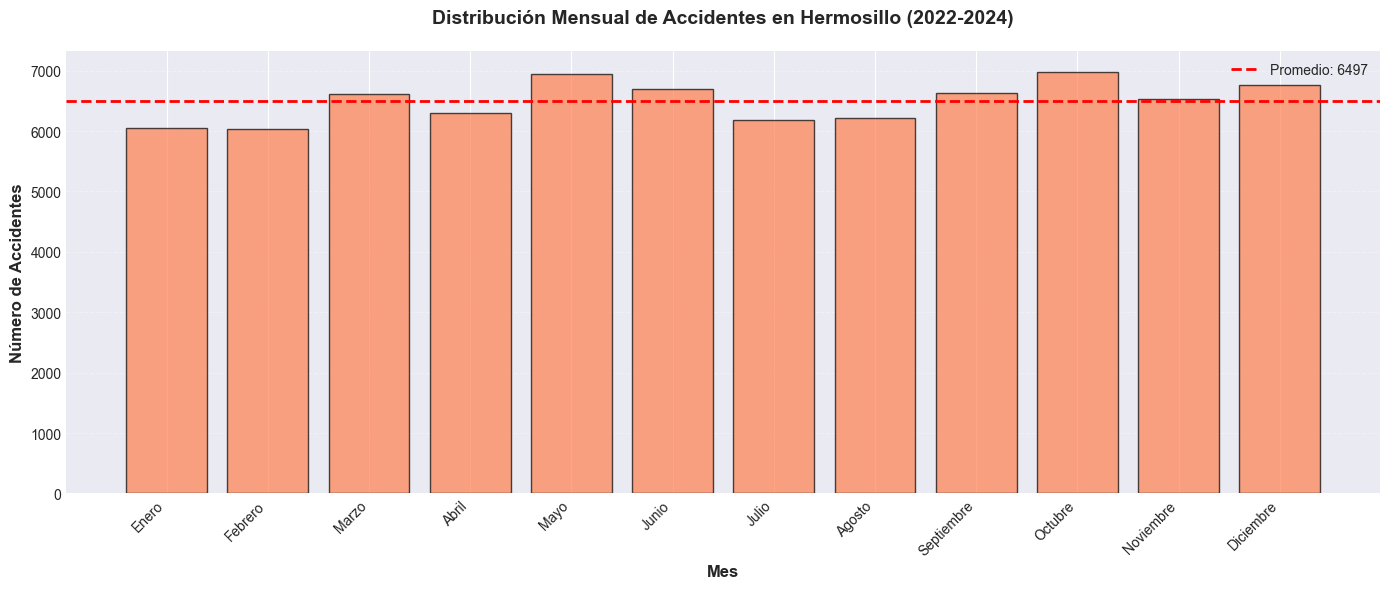

In [122]:
# Accidentes por mes
meses_nombres = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

accidentes_mensual = df.groupby('mes').size().reset_index(name='cantidad')
accidentes_mensual['mes_nombre'] = accidentes_mensual['mes'].map(meses_nombres)

# Visualización
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(range(len(accidentes_mensual)), accidentes_mensual['cantidad'], 
              color='coral', edgecolor='black', alpha=0.7)

ax.set_xticks(range(len(accidentes_mensual)))
ax.set_xticklabels(accidentes_mensual['mes_nombre'], rotation=45, ha='right')
ax.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax.set_title('Distribución Mensual de Accidentes en Hermosillo (2022-2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Línea de promedio
promedio = accidentes_mensual['cantidad'].mean()
ax.axhline(y=promedio, color='red', linestyle='--', linewidth=2, 
           label=f'Promedio: {promedio:.0f}')
ax.legend()

plt.tight_layout()
plt.show()

In [123]:
print("ANÁLISIS MENSUAL")
print(accidentes_mensual[['mes_nombre', 'cantidad']].to_string(index=False))
print(f"\n📊 Mes con más accidentes: {accidentes_mensual.loc[accidentes_mensual['cantidad'].idxmax(), 'mes_nombre']}")
print(f"📊 Mes con menos accidentes: {accidentes_mensual.loc[accidentes_mensual['cantidad'].idxmin(), 'mes_nombre']}")


ANÁLISIS MENSUAL
mes_nombre  cantidad
     Enero      6054
   Febrero      6031
     Marzo      6616
     Abril      6304
      Mayo      6947
     Junio      6693
     Julio      6189
    Agosto      6223
Septiembre      6631
   Octubre      6979
 Noviembre      6537
 Diciembre      6759

📊 Mes con más accidentes: Octubre
📊 Mes con menos accidentes: Febrero


### 3.3 Distribución por Día de la Semana


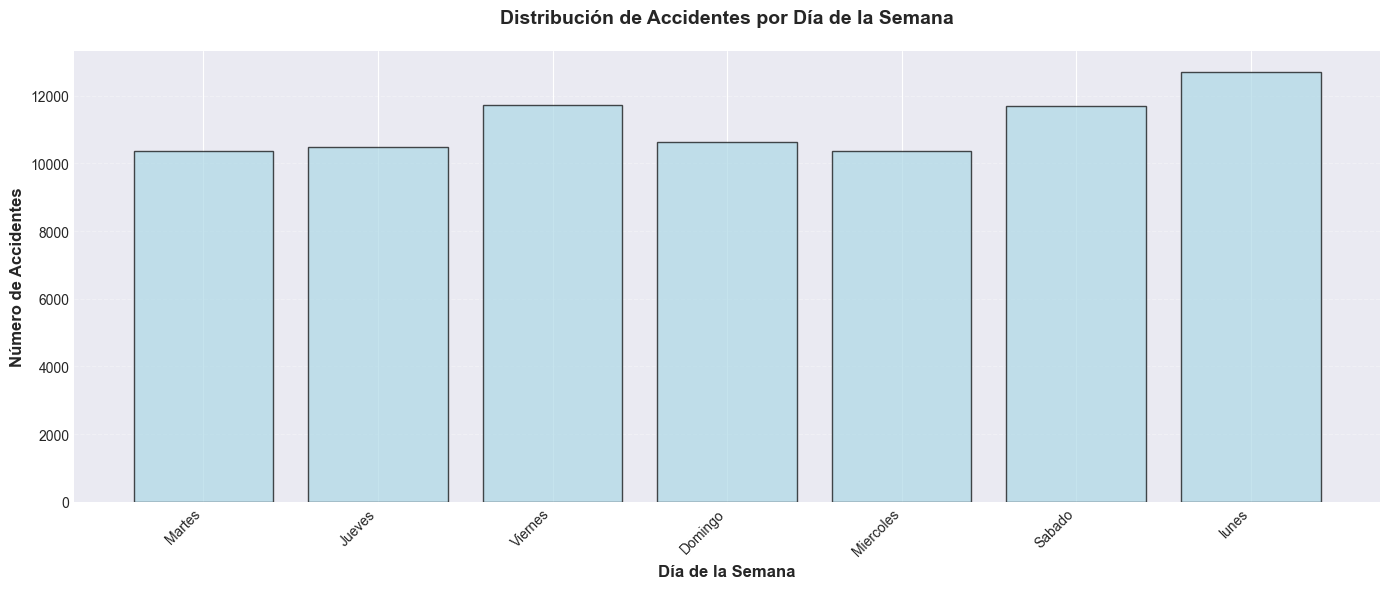

In [124]:
# Accidentes por día de la semana
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
accidentes_dia = df.groupby('diasemana').size().reset_index(name='cantidad')
accidentes_dia['dia_cat'] = pd.Categorical(accidentes_dia['diasemana'], 
                                             categories=dias_orden)
accidentes_dia = accidentes_dia.sort_values('dia_cat')

# Visualización
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(accidentes_dia['diasemana'], accidentes_dia['cantidad'], 
              color='LightBlue', edgecolor='black', alpha=0.7)

ax.set_xlabel('Día de la Semana', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Accidentes por Día de la Semana', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [125]:
print("ANÁLISIS POR DÍA DE LA SEMANA")
print(accidentes_dia[['diasemana', 'cantidad']].to_string(index=False))

ANÁLISIS POR DÍA DE LA SEMANA
diasemana  cantidad
   Martes     10368
   Jueves     10469
  Viernes     11728
  Domingo     10641
Miercoles     10374
   Sabado     11690
    lunes     12693


### 3.4 Distribución por Hora del Día


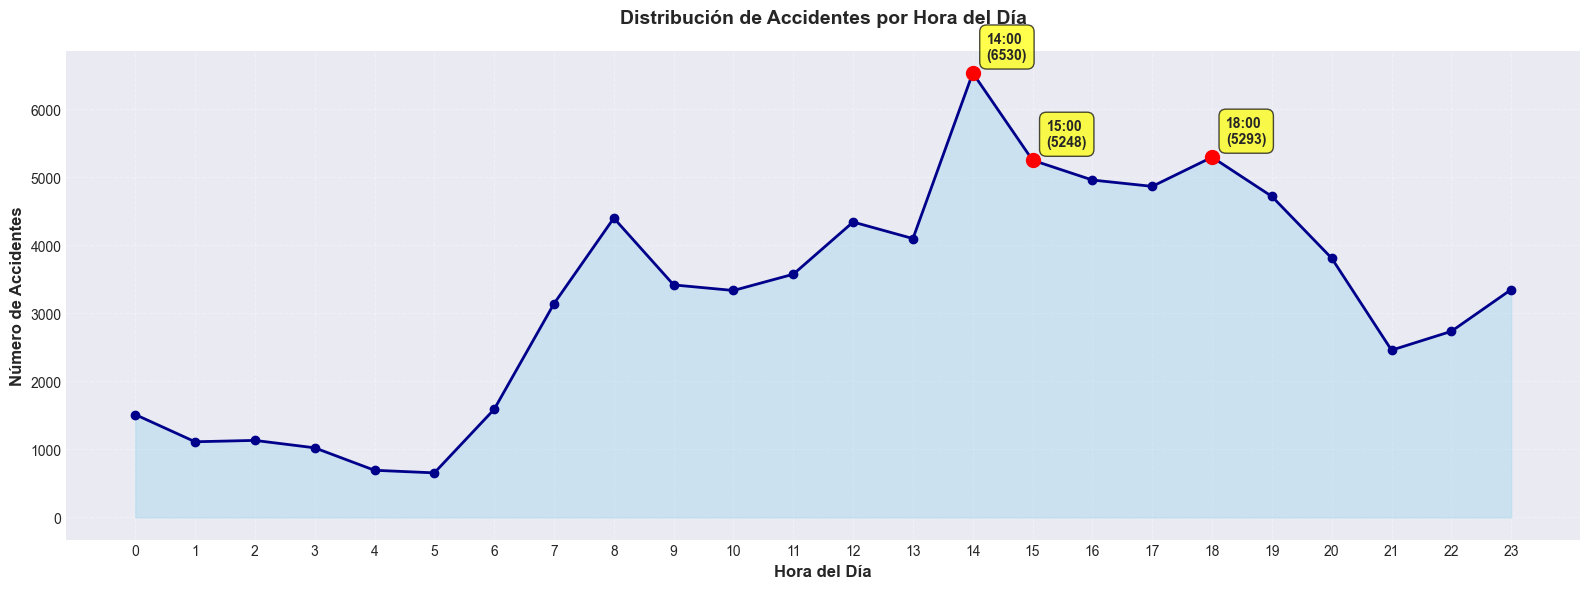

In [126]:
# Accidentes por hora
accidentes_hora = df.groupby('id_hora').size().reset_index(name='cantidad')
accidentes_hora = accidentes_hora[accidentes_hora['id_hora'] != 99]
# Visualización
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(accidentes_hora['id_hora'], accidentes_hora['cantidad'], 
        marker='o', linewidth=2, markersize=6, color='darkblue')
ax.fill_between(accidentes_hora['id_hora'], accidentes_hora['cantidad'], 
                alpha=0.3, color='skyblue')

# Destacar horas pico
horas_pico = accidentes_hora.nlargest(3, 'cantidad')
for _, row in horas_pico.iterrows():
    ax.plot(row['id_hora'], row['cantidad'], 'ro', markersize=10)
    ax.annotate(f"{row['id_hora']}:00\n({int(row['cantidad'])})", 
                xy=(row['id_hora'], row['cantidad']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                fontweight='bold')

ax.set_xlabel('Hora del Día', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Accidentes por Hora del Día', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(0, 24))
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [127]:

print("HORAS MÁS PELIGROSAS (TOP 5)")
print(accidentes_hora.nlargest(5, 'cantidad').to_string(index=False))


HORAS MÁS PELIGROSAS (TOP 5)
 id_hora  cantidad
      14      6530
      18      5293
      15      5248
      16      4957
      17      4864



## 4. ANÁLISIS DE VEHÍCULOS INVOLUCRADOS
### 4.1 Tipos de Vehículos en Accidentes

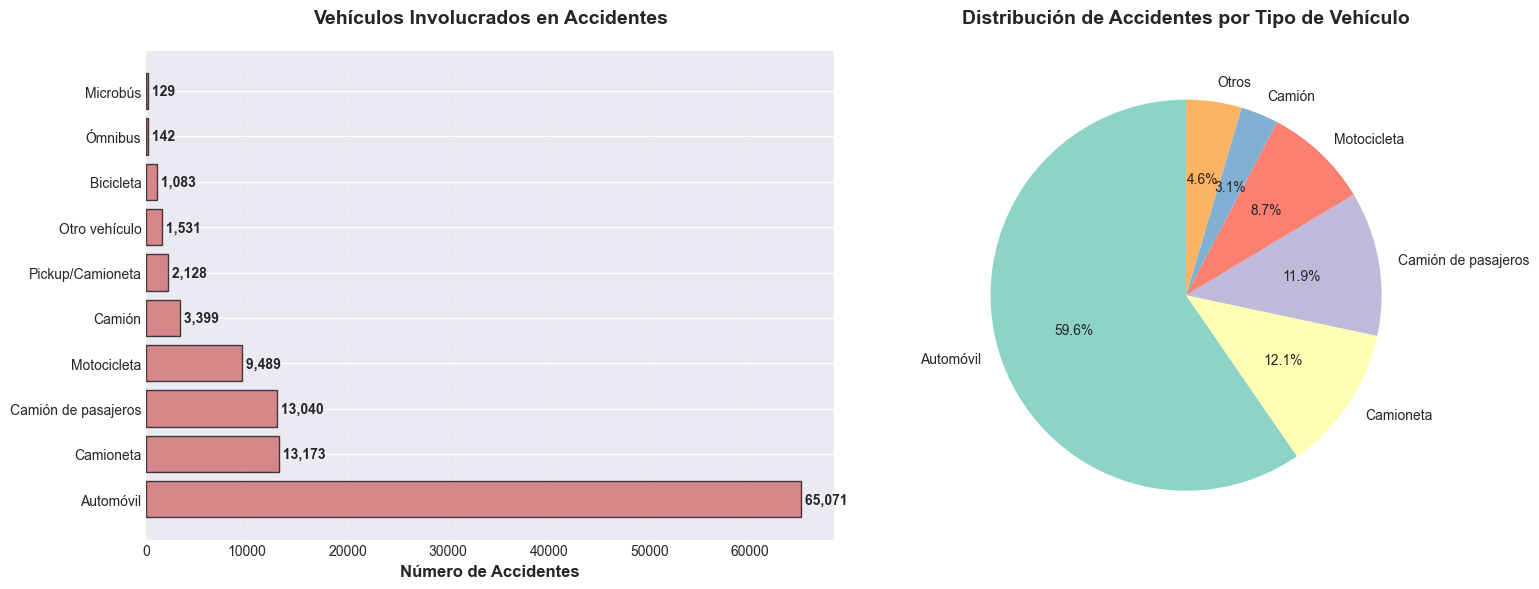

In [128]:
# Identificar columnas de vehículos
columnas_vehiculos = ['automovil', 'campasaj', 'microbus', 'pascamion', 
                      'omnibus', 'camioneta', 'camion', 'motociclet', 
                      'bicicleta', 'otrovehic']

# Mapeo de nombres legibles
nombres_vehiculos = {
    'automovil': 'Automóvil',
    'campasaj': 'Camión de pasajeros',
    'microbus': 'Microbús',
    'pascamion': 'Pickup/Camioneta',
    'omnibus': 'Ómnibus',
    'camioneta': 'Camioneta',
    'camion': 'Camión',
    'motociclet': 'Motocicleta',
    'bicicleta': 'Bicicleta',
    'otrovehic': 'Otro vehículo'
}

# Contar accidentes por tipo de vehículo
vehiculos_accidentes = {}
for col in columnas_vehiculos:
    if col in df.columns:
        vehiculos_accidentes[nombres_vehiculos[col]] = (df[col] > 0).sum()

vehiculos_df = pd.DataFrame(list(vehiculos_accidentes.items()), 
                            columns=['Vehiculo', 'Accidentes'])
vehiculos_df = vehiculos_df.sort_values('Accidentes', ascending=False)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
bars = ax1.barh(vehiculos_df['Vehiculo'], vehiculos_df['Accidentes'], 
                color='indianred', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax1.set_title('Vehículos Involucrados en Accidentes', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Agregar valores
for i, (bar, val) in enumerate(zip(bars, vehiculos_df['Accidentes'])):
    ax1.text(val, bar.get_y() + bar.get_height()/2, 
             f' {int(val):,}', va='center', fontweight='bold')

# Gráfico de pastel (top 5)
top5 = vehiculos_df.head(5)
otros_sum = vehiculos_df.iloc[5:]['Accidentes'].sum()
if otros_sum > 0:
    top5 = pd.concat([top5, pd.DataFrame({'Vehiculo': ['Otros'], 
                                          'Accidentes': [otros_sum]})])

colors_pie = plt.cm.Set3(range(len(top5)))
ax2.pie(top5['Accidentes'], labels=top5['Vehiculo'], autopct='%1.1f%%',
        startangle=90, colors=colors_pie, textprops={'fontsize': 10})
ax2.set_title('Distribución de Accidentes por Tipo de Vehículo', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


In [129]:
print("RANKING DE VEHÍCULOS MÁS INVOLUCRADOS EN ACCIDENTES")
vehiculos_df['Porcentaje'] = (vehiculos_df['Accidentes'] / vehiculos_df['Accidentes'].sum() * 100).round(2)
print(vehiculos_df.to_string(index=False))

print(f"\n🚗 VEHÍCULO MÁS COMUN EN ACCIDENTES: {vehiculos_df.iloc[0]['Vehiculo']}")
print(f"   Total de accidentes: {vehiculos_df.iloc[0]['Accidentes']:,}")
print(f"   Porcentaje del total: {vehiculos_df.iloc[0]['Porcentaje']:.1f}%")


RANKING DE VEHÍCULOS MÁS INVOLUCRADOS EN ACCIDENTES
           Vehiculo  Accidentes  Porcentaje
          Automóvil       65071       59.60
          Camioneta       13173       12.06
Camión de pasajeros       13040       11.94
        Motocicleta        9489        8.69
             Camión        3399        3.11
   Pickup/Camioneta        2128        1.95
      Otro vehículo        1531        1.40
          Bicicleta        1083        0.99
            Ómnibus         142        0.13
           Microbús         129        0.12

🚗 VEHÍCULO MÁS COMUN EN ACCIDENTES: Automóvil
   Total de accidentes: 65,071
   Porcentaje del total: 59.6%


### 4.2 Análisis de Severidad por Tipo de Vehículo


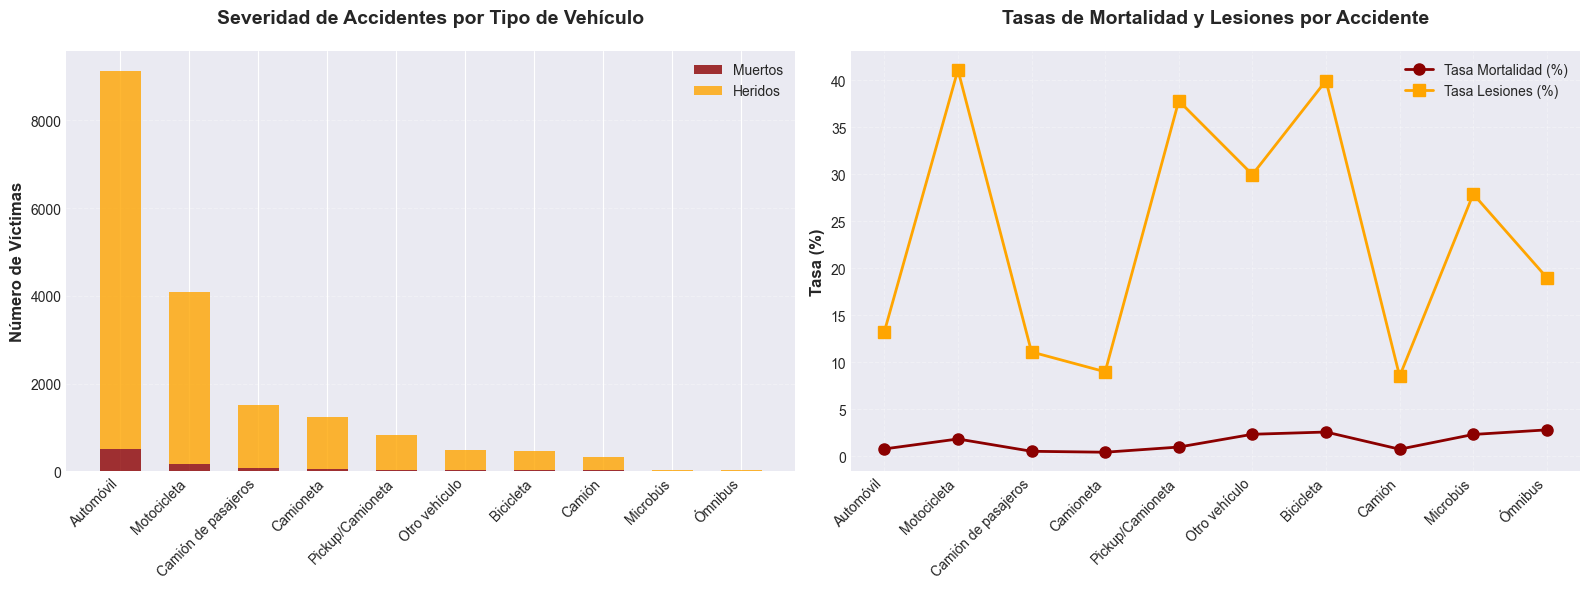

In [130]:
# Calcular muertos y heridos por tipo de vehículo
severidad_vehiculos = []

for col in columnas_vehiculos:
    if col in df.columns:
        df_vehiculo = df[df[col] > 0]
        
        total_muertos = (
            df_vehiculo['condmuerto'].sum() + 
            df_vehiculo['pasamuerto'].sum() + 
            df_vehiculo['peatmuerto'].sum() + 
            df_vehiculo['ciclmuerto'].sum() + 
            df_vehiculo['otromuerto'].sum()
        )
        
        total_heridos = (
            df_vehiculo['condherido'].sum() + 
            df_vehiculo['pasaherido'].sum() + 
            df_vehiculo['peatherido'].sum() + 
            df_vehiculo['ciclherido'].sum() + 
            df_vehiculo['otroherido'].sum()
        )
        
        severidad_vehiculos.append({
            'Vehiculo': nombres_vehiculos[col],
            'Accidentes': len(df_vehiculo),
            'Muertos': int(total_muertos),
            'Heridos': int(total_heridos),
            'Total_Victimas': int(total_muertos + total_heridos)
        })
        
severidad_df = pd.DataFrame(severidad_vehiculos)
severidad_df = severidad_df.sort_values('Total_Victimas', ascending=False)
severidad_df['Tasa_Mortalidad'] = (severidad_df['Muertos'] / severidad_df['Accidentes'] * 100).round(2)
severidad_df['Tasa_Lesiones'] = (severidad_df['Heridos'] / severidad_df['Accidentes'] * 100).round(2)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras apiladas
x = range(len(severidad_df))
width = 0.6
p1 = ax1.bar(x, severidad_df['Muertos'], width, label='Muertos', color='darkred', alpha=0.8)
p2 = ax1.bar(x, severidad_df['Heridos'], width, bottom=severidad_df['Muertos'], 
             label='Heridos', color='orange', alpha=0.8)

ax1.set_xticks(x)
ax1.set_xticklabels(severidad_df['Vehiculo'], rotation=45, ha='right')
ax1.set_ylabel('Número de Víctimas', fontsize=12, fontweight='bold')
ax1.set_title('Severidad de Accidentes por Tipo de Vehículo', 
              fontsize=14, fontweight='bold', pad=20)
ax1.legend()
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico de tasas
ax2.plot(severidad_df['Vehiculo'], severidad_df['Tasa_Mortalidad'], 
         marker='o', linewidth=2, markersize=8, label='Tasa Mortalidad (%)', color='darkred')
ax2.plot(severidad_df['Vehiculo'], severidad_df['Tasa_Lesiones'], 
         marker='s', linewidth=2, markersize=8, label='Tasa Lesiones (%)', color='orange')

ax2.set_xticklabels(severidad_df['Vehiculo'], rotation=45, ha='right')
ax2.set_ylabel('Tasa (%)', fontsize=12, fontweight='bold')
ax2.set_title('Tasas de Mortalidad y Lesiones por Accidente', 
              fontsize=14, fontweight='bold', pad=20)
ax2.legend()
ax2.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [131]:
print("ANÁLISIS DE SEVERIDAD POR TIPO DE VEHÍCULO")
print(severidad_df.to_string(index=False))


ANÁLISIS DE SEVERIDAD POR TIPO DE VEHÍCULO
           Vehiculo  Accidentes  Muertos  Heridos  Total_Victimas  Tasa_Mortalidad  Tasa_Lesiones
          Automóvil       65071      513     8618            9131             0.79          13.24
        Motocicleta        9489      176     3902            4078             1.85          41.12
Camión de pasajeros       13040       70     1449            1519             0.54          11.11
          Camioneta       13173       58     1186            1244             0.44           9.00
   Pickup/Camioneta        2128       21      805             826             0.99          37.83
      Otro vehículo        1531       36      459             495             2.35          29.98
          Bicicleta        1083       28      433             461             2.59          39.98
             Camión        3399       26      290             316             0.76           8.53
           Microbús         129        3       36              39          

Aqui hay que fijarse en las tasas de mortalidad y lesiones para saber el peligro de cada vehiculo:

- Aunque la cantidad de muertos es mas alta en vehiculos, es importante notar la cantidad de accidentes que estan registrados, de forma que en realidad comparado a otros vehiculos, los automoviles son mas seguros de lo que podria parecer a primera vista
- Algunos vehiculos son definitivamente mas peligrosos, observando la tasa de mortalidad:
    - La mortalidad en las bicicletas es mas alta que en el resto de vehiculos (No representa la cantidad de muertos, representa la mortalidad contra los demas vehiculos)
    - La mortalidad de Microbus
    - Omnibus
    - Otro vehiculo

## 5. ANÁLISIS DE CAUSAS DE ACCIDENTES
### 5.1 Principales Causas

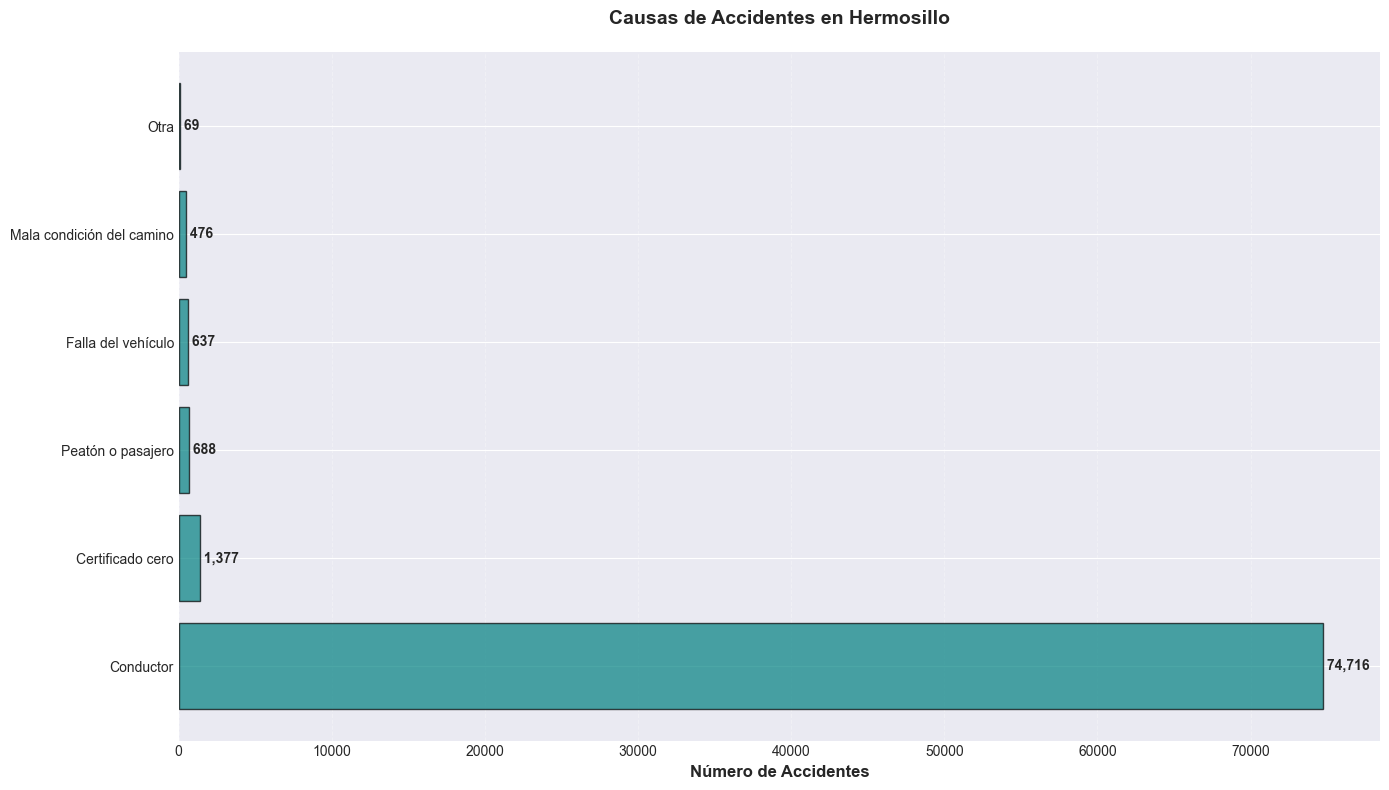

In [132]:
# Causas de accidentes
causas_accidentes = df['causaacci'].value_counts().reset_index()
causas_accidentes.columns = ['Causa', 'Cantidad']

# Visualización
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(range(len(causas_accidentes)), causas_accidentes['Cantidad'], 
               color='teal', edgecolor='black', alpha=0.7)

ax.set_yticks(range(len(causas_accidentes)))
ax.set_yticklabels(causas_accidentes['Causa'], fontsize=10)
ax.set_xlabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax.set_title('Causas de Accidentes en Hermosillo', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Agregar valores
for i, (bar, val) in enumerate(zip(bars, causas_accidentes['Cantidad'])):
    ax.text(val, bar.get_y() + bar.get_height()/2, 
            f' {int(val):,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [133]:
print("CAUSAS DE ACCIDENTES")
causas_accidentes['Porcentaje'] = (causas_accidentes['Cantidad'] / len(df) * 100).round(2)
print(causas_accidentes.to_string(index=False))


CAUSAS DE ACCIDENTES
                    Causa  Cantidad  Porcentaje
                Conductor     74716       95.84
         Certificado cero      1377        1.77
        Peatón o pasajero       688        0.88
       Falla del vehículo       637        0.82
Mala condición del camino       476        0.61
                     Otra        69        0.09


## 6. ANÁLISIS DE TIPOS DE ACCIDENTE 


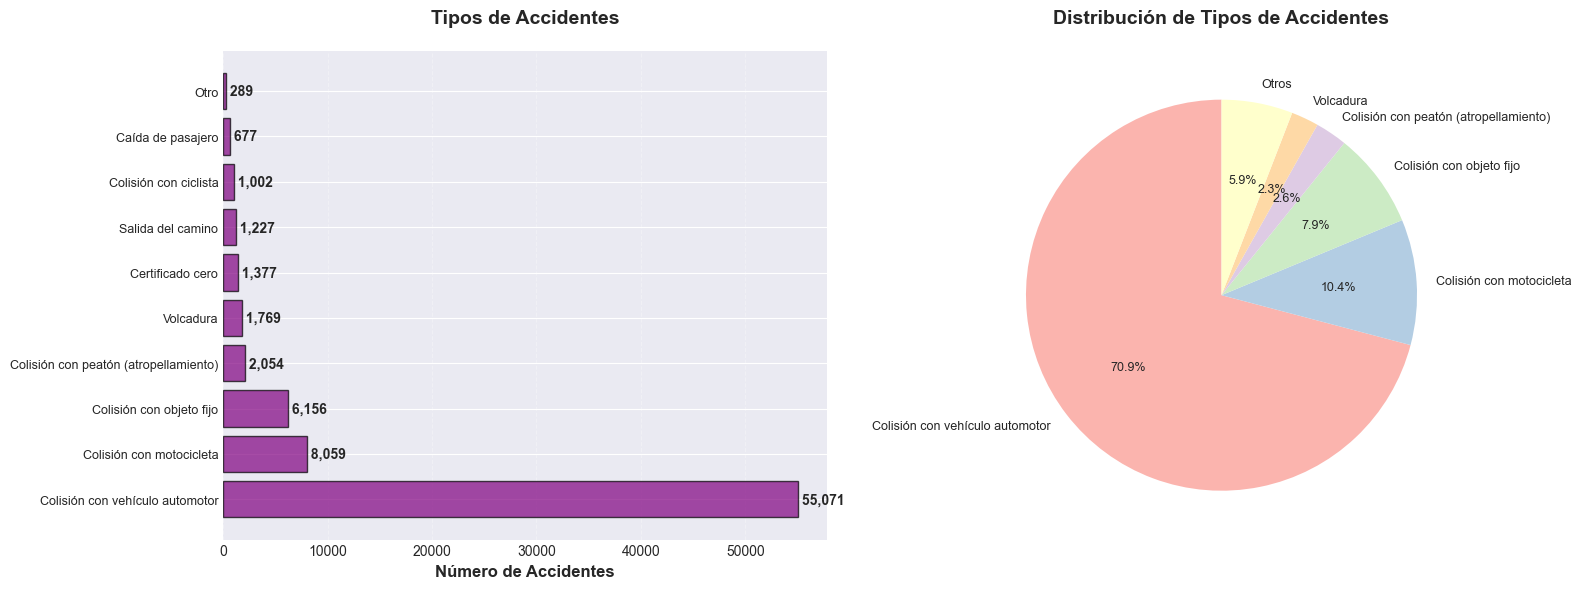

In [134]:
# Tipos de accidente
tipos_accidente = df['tipaccid'].value_counts().head(10).reset_index()
tipos_accidente.columns = ['Tipo', 'Cantidad']

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Barras horizontales
bars = ax1.barh(range(len(tipos_accidente)), tipos_accidente['Cantidad'], 
                color='purple', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(tipos_accidente)))
ax1.set_yticklabels(tipos_accidente['Tipo'], fontsize=9)
ax1.set_xlabel('Número de Accidentes', fontsize=12, fontweight='bold')
ax1.set_title('Tipos de Accidentes', fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars, tipos_accidente['Cantidad'])):
    ax1.text(val, bar.get_y() + bar.get_height()/2, 
             f' {int(val):,}', va='center', fontweight='bold')

# Gráfico de pastel
top5_tipos = tipos_accidente.head(5)
otros_tipos_sum = tipos_accidente.iloc[5:]['Cantidad'].sum()
if otros_tipos_sum > 0:
    top5_tipos = pd.concat([top5_tipos, pd.DataFrame({'Tipo': ['Otros'], 
                                                       'Cantidad': [otros_tipos_sum]})])
colors = plt.cm.Pastel1(range(len(top5_tipos)))
ax2.pie(top5_tipos['Cantidad'], labels=top5_tipos['Tipo'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 9})
ax2.set_title('Distribución de Tipos de Accidentes', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()



In [135]:
print("TIPOS DE ACCIDENTES")
tipos_accidente['Porcentaje'] = (tipos_accidente['Cantidad'] / len(df) * 100).round(2)
print(tipos_accidente.to_string(index=False))

TIPOS DE ACCIDENTES
                                 Tipo  Cantidad  Porcentaje
      Colisión con vehículo automotor     55071       70.64
             Colisión con motocicleta      8059       10.34
             Colisión con objeto fijo      6156        7.90
Colisión con peatón (atropellamiento)      2054        2.63
                            Volcadura      1769        2.27
                     Certificado cero      1377        1.77
                    Salida del camino      1227        1.57
                Colisión con ciclista      1002        1.29
                    Caída de pasajero       677        0.87
                                 Otro       289        0.37


## 7. ANALISIS FINAL - ENFOQUE EN VEHICULOS (MODELADO)

### 5.1 Análisis de Correlación: Severidad vs Características del Accidente


In [136]:
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Crear métricas de severidad por registro
df['total_victimas'] = (
    df['condmuerto'] + df['pasamuerto'] + df['peatmuerto'] + 
    df['ciclmuerto'] + df['otromuerto'] + df['condherido'] + 
    df['pasaherido'] + df['peatherido'] + df['ciclherido'] + df['otroherido']
)

df['total_muertos'] = (
    df['condmuerto'] + df['pasamuerto'] + df['peatmuerto'] + 
    df['ciclmuerto'] + df['otromuerto']
)

df['total_heridos'] = (
    df['condherido'] + df['pasaherido'] + df['peatherido'] + 
    df['ciclherido'] + df['otroherido']
)

# Clasificar severidad
df['nivel_severidad'] = pd.cut(df['total_victimas'], 
                                bins=[-1, 0, 1, 3, np.inf],
                                labels=['Sin víctimas', 'Leve', 'Moderado', 'Grave'])

# Crear categoría de accidente fatal
df['es_fatal'] = (df['total_muertos'] > 0).astype(int)

print("✅ Métricas de severidad calculadas")
print(f"\nDistribución de severidad:")
print(df['nivel_severidad'].value_counts())

✅ Métricas de severidad calculadas

Distribución de severidad:
nivel_severidad
Sin víctimas    68780
Leve             7470
Moderado         1485
Grave             228
Name: count, dtype: int64


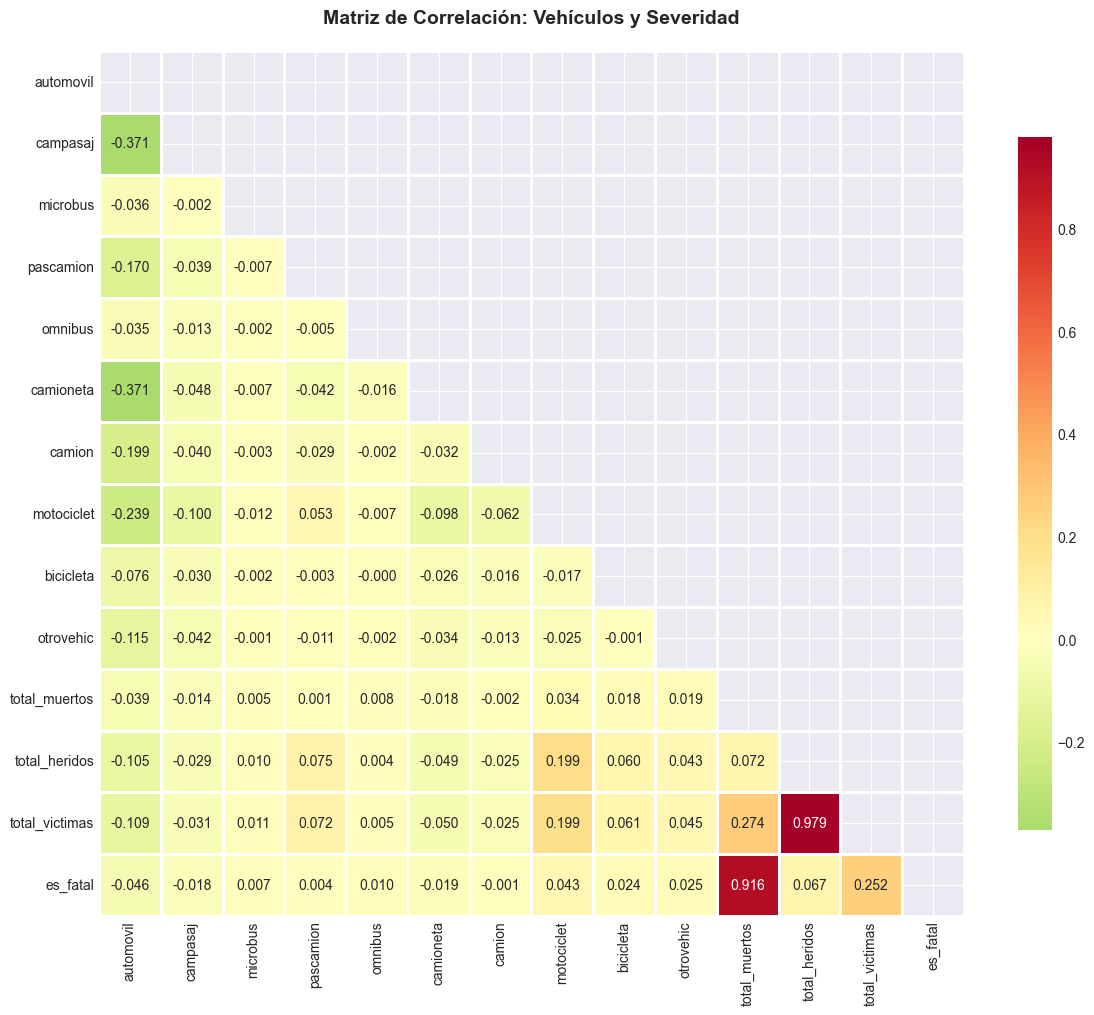

In [137]:
# Matriz de correlación: vehículos y severidad
columnas_vehiculos = ['automovil', 'campasaj', 'microbus', 'pascamion', 
                      'omnibus', 'camioneta', 'camion', 'motociclet', 
                      'bicicleta', 'otrovehic']

# Crear dataframe para correlaciones
df_corr = df[columnas_vehiculos + ['total_muertos', 'total_heridos', 'total_victimas', 'es_fatal']].copy()

# Calcular correlaciones
correlacion = df_corr.corr()

# Visualización
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, mask=mask, annot=True, fmt='.3f', cmap='RdYlGn_r',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
ax.set_title('Matriz de Correlación: Vehículos y Severidad', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Parece que no existen correlaciones fuertes con los totales de victimas y los vehiculos, por lo tanto pasare a otras visualizaciones

### 5.2 Análisis de Severidad por Tipo de Vehículo y Causa


In [138]:
# Función para analizar severidad por vehículo y causa
def analizar_vehiculo_causa(df, col_vehiculo, nombre_vehiculo, top_n=10):
    """Analiza las causas más mortales para un tipo de vehículo"""
    
    # Filtrar accidentes con este vehículo
    df_vehiculo = df[df[col_vehiculo] > 0].copy()
    
    # Agrupar por causa y calcular métricas
    analisis = df_vehiculo.groupby('causaacci').agg({
        'causaacci': 'count',
        'total_muertos': 'sum',
        'total_heridos': 'sum',
        'total_victimas': 'sum',
        'es_fatal': 'sum'
    }).rename(columns={'causaacci': 'accidentes'})
    
    # Calcular tasas
    analisis['tasa_mortalidad'] = (analisis['total_muertos'] / analisis['accidentes'] * 100).round(2)
    analisis['tasa_lesiones'] = (analisis['total_heridos'] / analisis['accidentes'] * 100).round(2)
    
    # Filtrar causas con al menos 10 accidentes
    analisis = analisis[analisis['accidentes'] >= 10]
    
    return analisis.sort_values('tasa_mortalidad', ascending=False).head(top_n)

# Analizar los vehículos más peligrosos vistos en el análisis previo
vehiculos_peligrosos = [
    ('motociclet', 'Motocicleta'),
    ('bicicleta', 'Bicicleta'),
    ('omnibus', 'Ómnibus'),
    ('microbus', 'Microbús'),
    ('otrovehic', 'Otro vehículo'),
    ('camioneta', 'Pickup/Camioneta'),

]
            
resultados_analisis = {}
print("ANÁLISIS DE CAUSAS MÁS MORTALES POR TIPO DE VEHÍCULO")
print("Por cada 100 accidentes, se presentan las siguientes tasas de mortalidad:")
for col, nombre in vehiculos_peligrosos:
    print("\n" + "="*80)
    print(f"CAUSAS MÁS MORTALES - {nombre.upper()}")
    
    analisis = analizar_vehiculo_causa(df, col, nombre)
    resultados_analisis[nombre] = analisis
    
    print(analisis[['accidentes', 'total_muertos', 'tasa_mortalidad']].to_string())


ANÁLISIS DE CAUSAS MÁS MORTALES POR TIPO DE VEHÍCULO
Por cada 100 accidentes, se presentan las siguientes tasas de mortalidad:

CAUSAS MÁS MORTALES - MOTOCICLETA
                           accidentes  total_muertos  tasa_mortalidad
causaacci                                                            
Peatón o pasajero                  82              6             7.32
Mala condición del camino         135              3             2.22
Conductor                        9218            167             1.81
Falla del vehículo                 45              0             0.00

CAUSAS MÁS MORTALES - BICICLETA
           accidentes  total_muertos  tasa_mortalidad
causaacci                                            
Conductor        1065             28             2.63

CAUSAS MÁS MORTALES - ÓMNIBUS
           accidentes  total_muertos  tasa_mortalidad
causaacci                                            
Conductor         130              4             3.08

CAUSAS MÁS MORTALES - MICROBÚ

### 5.3 Visualización Comparativa: Causas Mortales por Vehículo


Algunas de las siguientes graficas no se ven tan bien por que solo esta registrado un tipo de accidente para estos vehiculos.

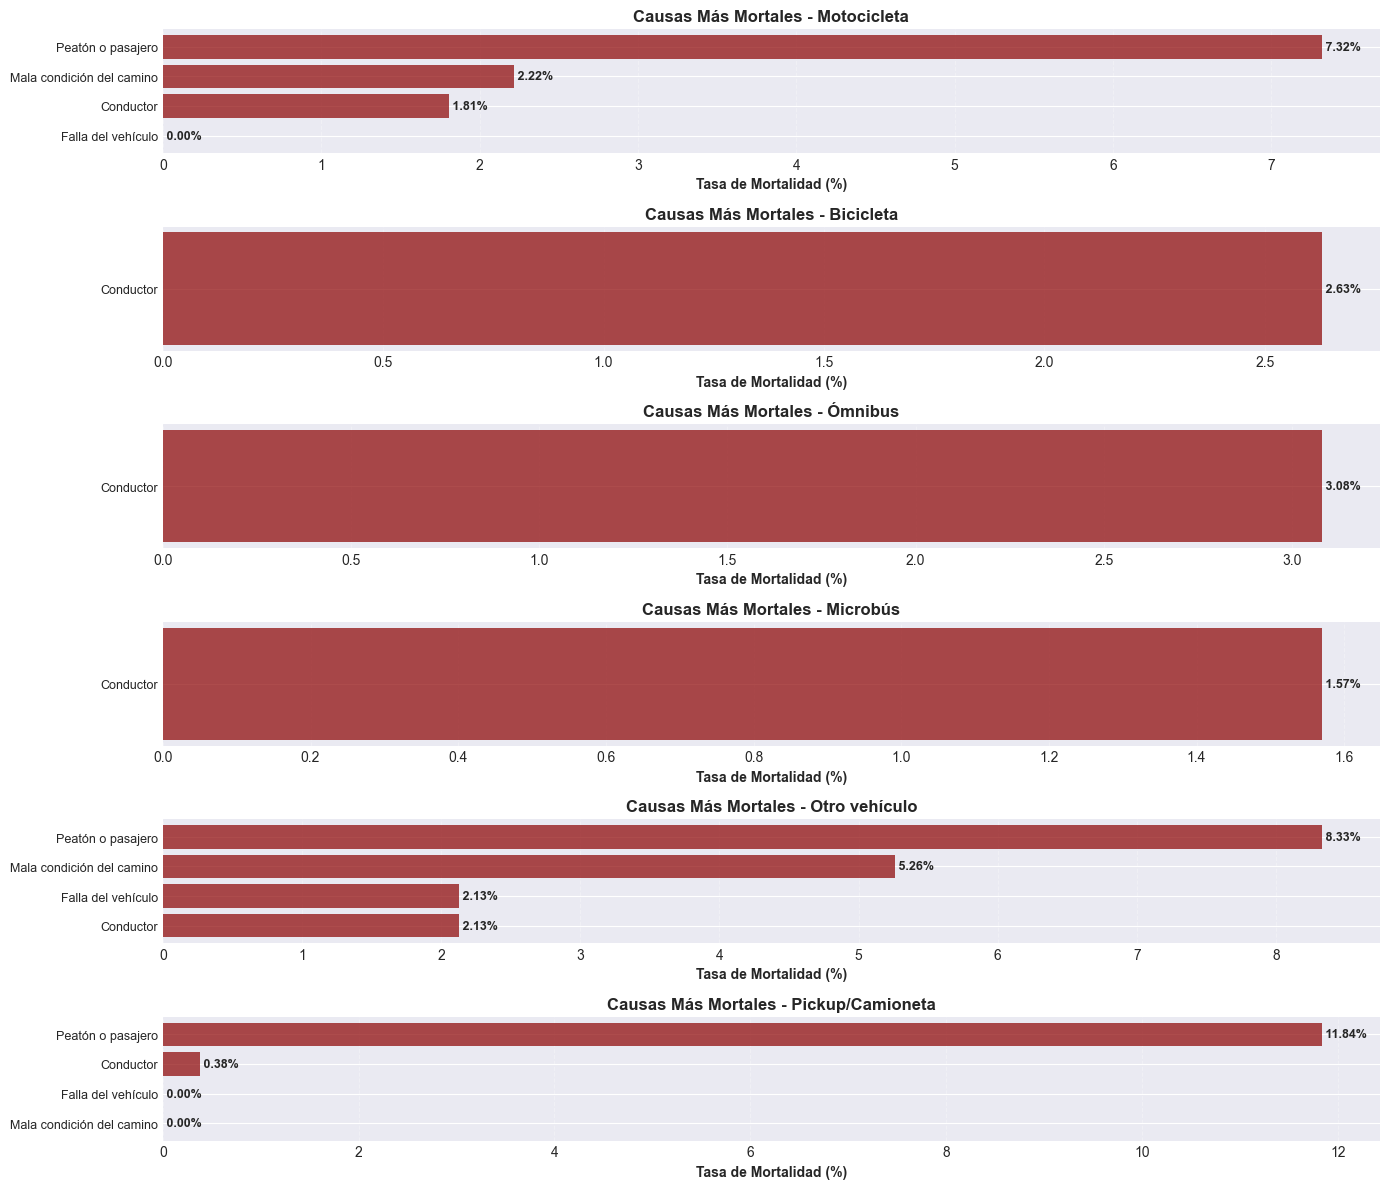

In [139]:
# Crear visualización comparativa
fig, axes = plt.subplots(6, 1, figsize=(14, 12))

for idx, (col, nombre) in enumerate(vehiculos_peligrosos):
    ax = axes[idx]
    
    analisis = resultados_analisis[nombre].head(8)
    
    # Crear barras
    x = range(len(analisis))
    bars = ax.barh(x, analisis['tasa_mortalidad'], color='darkred', alpha=0.7, label='Tasa Mortalidad')
    
    # Agregar valores
    for i, (bar, val) in enumerate(zip(bars, analisis['tasa_mortalidad'])):
        ax.text(val, bar.get_y() + bar.get_height()/2, 
                f' {val:.2f}%', va='center', fontweight='bold', fontsize=9)
    
    # Configurar ejes
    ax.set_yticks(x)
    ax.set_yticklabels(analisis.index, fontsize=9)
    ax.set_xlabel('Tasa de Mortalidad (%)', fontsize=10, fontweight='bold')
    ax.set_title(f'Causas Más Mortales - {nombre}', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

Cada vehiculo tiene diferentes tipos de accidentes mortales, sin embargo parece ser que para los vehiculos con los mayores porcentajes, los accidentes son principalemente causados por culpa del peaton o pasajero (**Motocicleta, Otro Vehiculo, Pickup/Camioneta**), seguido de mala condicion del camino (**Motocicleta, Otro Vehiculo**)

### 5.4 Análisis de Clustering: Perfiles de Riesgo


In [140]:
# Preparar datos para clustering
# Crear matriz de características por tipo de vehículo

caracteristicas_vehiculos = []

for col in columnas_vehiculos:
    if col in df.columns:
        df_vehiculo = df[df[col] > 0]
        
        # Calcular características
        features = {
            'vehiculo': nombres_vehiculos[col],
            'total_accidentes': len(df_vehiculo),
            'tasa_mortalidad': (df_vehiculo['total_muertos'].sum() / len(df_vehiculo) * 100),
            'tasa_lesiones': (df_vehiculo['total_heridos'].sum() / len(df_vehiculo) * 100),
            'pct_accidentes_fatales': (df_vehiculo['es_fatal'].sum() / len(df_vehiculo) * 100),
            'promedio_victimas': df_vehiculo['total_victimas'].mean(),
            'max_victimas': df_vehiculo['total_victimas'].max(),
            # Características temporales
            'pct_noche': ((df_vehiculo['id_hora'] >= 20) | (df_vehiculo['id_hora'] <= 6)).sum() / len(df_vehiculo) * 100,
            'pct_fin_semana': (df_vehiculo['diasemana'].isin(['Sábado', 'Domingo'])).sum() / len(df_vehiculo) * 100,
        }
        
        caracteristicas_vehiculos.append(features)

caracteristicas_df = pd.DataFrame(caracteristicas_vehiculos)
caracteristicas_df = caracteristicas_df.set_index('vehiculo')


### 5.5 PCA: Reducción Dimensional para Visualización

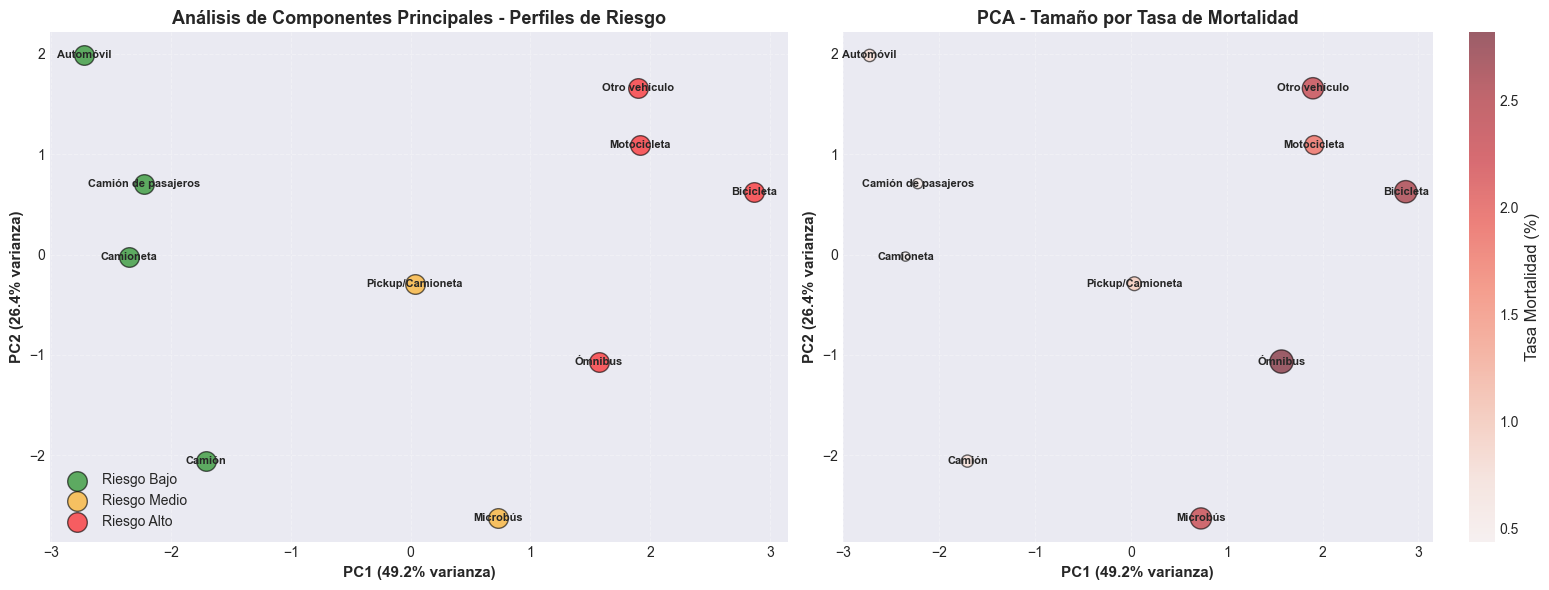


📊 Varianza explicada: 75.6%
   PC1: 49.2%
   PC2: 26.4%


In [141]:

# Normalizar datos
scaler = StandardScaler()
caracteristicas_scaled = scaler.fit_transform(caracteristicas_df)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
caracteristicas_df['cluster'] = kmeans.fit_predict(caracteristicas_scaled)

# Mapear clusters a niveles de riesgo
cluster_medias = caracteristicas_df.groupby('cluster')['tasa_mortalidad'].mean().sort_values()
riesgo_map = {cluster: f"Riesgo {['Bajo', 'Medio', 'Alto'][i]}" 
              for i, cluster in enumerate(cluster_medias.index)}
caracteristicas_df['nivel_riesgo'] = caracteristicas_df['cluster'].map(riesgo_map)

# Aplicar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(caracteristicas_scaled)

# Crear DataFrame para visualización
pca_df = pd.DataFrame(
    componentes_principales,
    columns=['PC1', 'PC2'],
    index=caracteristicas_df.index
)
pca_df['nivel_riesgo'] = caracteristicas_df['nivel_riesgo']
pca_df['tasa_mortalidad'] = caracteristicas_df['tasa_mortalidad']

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Coloreado por nivel de riesgo
colors = {'Riesgo Bajo': 'green', 'Riesgo Medio': 'orange', 'Riesgo Alto': 'red'}
for riesgo in pca_df['nivel_riesgo'].unique():
    mask = pca_df['nivel_riesgo'] == riesgo
    ax1.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'],
                label=riesgo, s=200, alpha=0.6, edgecolors='black',
                color=colors[riesgo])

for idx, row in pca_df.iterrows():
    ax1.annotate(idx, (row['PC1'], row['PC2']), fontsize=8, 
                ha='center', va='center', fontweight='bold')

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)', 
               fontsize=11, fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)', 
               fontsize=11, fontweight='bold')
ax1.set_title('Análisis de Componentes Principales - Perfiles de Riesgo', 
              fontsize=13, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(alpha=0.3, linestyle='--')

# Gráfico 2: Tamaño por tasa de mortalidad
scatter = ax2.scatter(pca_df['PC1'], pca_df['PC2'], 
                     s=pca_df['tasa_mortalidad']*100, 
                     c=pca_df['tasa_mortalidad'], 
                     cmap='Reds', alpha=0.6, edgecolors='black')

for idx, row in pca_df.iterrows():
    ax2.annotate(idx, (row['PC1'], row['PC2']), fontsize=8,
                ha='center', va='center', fontweight='bold')

ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)', 
               fontsize=11, fontweight='bold')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)', 
               fontsize=11, fontweight='bold')
ax2.set_title('PCA - Tamaño por Tasa de Mortalidad', 
              fontsize=13, fontweight='bold')
plt.colorbar(scatter, ax=ax2, label='Tasa Mortalidad (%)')
ax2.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"\n📊 Varianza explicada: {pca.explained_variance_ratio_.sum()*100:.1f}%")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.1f}%")


In [142]:
# Interpretación de componentes principales (PC1, PC2)

# Seleccionar las columnas originales usadas en PCA (excluir columnas añadidas luego)
feature_cols = [c for c in caracteristicas_df.columns if c not in ('cluster', 'nivel_riesgo')]
components = pca.components_  # shape: (n_components, n_features)

# Comprobar consistencia
assert components.shape[1] == len(feature_cols), "Número de características no coincide con PCA.components_"

# Loadings: pesos de cada característica en cada PC
loadings_df = pd.DataFrame(components.T, index=feature_cols, columns=[f'PC{i+1}' for i in range(components.shape[0])])

# Mostrar loadings y contribuciones
print("Carga (loadings) de cada característica en las PCs:")
display(loadings_df.round(4))




Carga (loadings) de cada característica en las PCs:


,PC1,PC2
total_accidentes,-0.2975,0.3633
tasa_mortalidad,0.4580,-0.0808
tasa_lesiones,0.4175,0.1186
pct_accidentes_fatales,0.4585,-0.0918
promedio_victimas,0.4311,0.1082
max_victimas,-0.3408,-0.0137
pct_noche,0.1223,0.6198
pct_fin_semana,0.0159,0.6655


## 7. HALLAZGOS CLAVE


### Hallazgos encontrados:
Aunque existen muchos accidentes en Sonora, la mayoria son causados por vehiculos personales, ya que este es el tipo de vehiculo mas comun en las calles.

A pesar de esto, la mayoria de accidentes no son mortales o no llevan a heridas mayores. Sin embargo, lo mismo no se puede decir de otros tipos de vehiculos, ya que hay multiples vehiculos donde si tienes un accidente, las probabilidades de que sea mortal son mas altas.

En la siguiente tabla podemos entender mucho del problema:

ANÁLISIS DE SEVERIDAD POR TIPO DE VEHÍCULO

| Vehiculo |  Accidentes | Muertos | Heridos | Total_Victimas | Tasa_Mortalidad | Tasa_Lesiones
| --------- | --------- | --------- | --------- | --------- | --------- | --------- 
| Automóvil | 65071 |  513 | 8618  | 9131 | 0.79 | 13.24
| Motocicleta | 9489 | 176 | 3902 | 4078 |  1.85  | 41.12
| Camión de pasajeros |  13040 | 70 |  1449 |  1519  | 0.54 | 11.11
| Camioneta |  13173 | 58 | 1186 | 1244 | 0.44 |  9.00
| Pickup/Camioneta  |  2128  |  21 | 805 | 826  | 0.99 |  37.83
| Otro vehículo |   1531 |  36  |  459   |       495  |         2.35   |     29.98
| Bicicleta  | 1083 | 28 | 433 | 461 | 2.59 | 39.98
| Camión | 3399 | 26 | 290 | 316 | 0.76 | 8.53
| Microbús | 129 | 3 | 36 | 39 | 2.33 | 27.91
| Ómnibus | 142 | 4 | 27 | 31 | 2.82 | 19.01

En esta tabla se puede notar la diferencia en que tan peligroso es cada vehiculo si observamos la tasa de mortalidad (cantidad de muertos por cada 100 accidentes), ya que aunque existan muchos accidentes, esto no significa que siempre muera alguien. Entonces como se puede ver, hay vehiculos que tienen una mucho mayor tasa de mortalidad que el resto aunque la cantidad de accidentes sea mucho menor.

En la tasa de lesiones si existe una mayor variedad, sin embargo nos estamos fijando en la mortalidad ya que esto es realmente lo mas peligroso de los accidentes.

---

Viendo las graficas y tablas de la exploracion de datos, podemos ver como la causa del accidente es importante ya que podemos como claramente hay diferente mortalidad dependiendo de la causa. 
- Los accidentes principalemente causados por culpa del peaton o pasajero tienen los siguientes porcentajes de ser mortales:
  - Motocicleta: 7.32%
  - Otro Vehiculo: 8.33%
  - Pickup/Camioneta: 11.84%

Estos son los accidentes mas mortales para estos vehiculos

- Estos porcentajes son seguidos de mala condicion del camino
  - Motocicleta: 2.22%
  - Otro Vehiculo: 5.26%

Para el resto de vehiculos la causa mas comun es por culpa del conductor.

Entonces, ¿Cuál es el vehículo más peligroso de manejar en Hermosillo y cuáles son las causas?

Cada vehiculo tiene diferentes razones por las cuales son peligrosos, sin embargo con base a los valores obtenidos, si tuvieses un accidente, el vehiculo mas mortal es el Omnibus. 

Pero si nos tomamos en cuenta que tan comun es que el vehiculo tenga accidentes, tambien tomando en cuenta la tasa de heridos, ningun otro vehiculo se compara a lo peligroso que es la motocicleta, es el vehiculo mas utilizado y con mayor cantidad de accidentes que el resto.